Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

Answer:Deep Learning is a subset of machine learning that uses multi-layered artificial neural networks to automatically learn hierarchical representations from data. It evolved from early neural network models like the perceptron and gained popularity due to increased computational power, large datasets, and advances in algorithms. Unlike traditional machine learning, which relies heavily on manual feature engineering, deep learning automatically extracts features from raw data and performs better on complex tasks such as image recognition, speech processing, and natural language understanding.

Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?

Answer:A perceptron is the simplest neural network consisting of input nodes, weights, a bias, a summation unit, and an activation function. It computes a weighted sum of inputs, adds a bias, and passes the result through an activation function to produce an output. Its main limitation is that it can only solve linearly separable problems and fails on problems like XOR that require non-linear decision boundaries.

Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

Answer:Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Sigmoid outputs values between 0 and 1 and is useful for probability-based outputs but suffers from vanishing gradients. ReLU outputs zero for negative inputs and the input itself for positive values, enabling faster training but can cause dead neurons. Tanh outputs values between -1 and 1, is zero-centered, and generally performs better than Sigmoid but can still suffer from vanishing gradients.

Question 4: What is the difference between Loss function and Cost function in neural networks?

Answer:A loss function measures the error for a single training example, while a cost function is the average loss over the entire dataset. For example, Mean Squared Error can be used as a loss for one sample, and the cost function is the mean of all such losses. Binary Cross-Entropy is commonly used as a loss function in classification tasks.

Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

Answer:Optimizers update neural network weights to minimize the loss function. Gradient Descent updates weights using the average gradient of the dataset but can be slow. RMSprop adapts the learning rate using a moving average of squared gradients, improving convergence. Adam combines the advantages of RMSprop and momentum, making it fast, efficient, and widely used in practice.

In [1]:
#Question 6: Single-layer perceptron for AND gate using NumPy

import numpy as np

# AND gate dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0
lr = 0.1

# Training
for _ in range(10):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = 1 if linear_output >= 0 else 0
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

# Output
print("Weights:", weights)
print("Bias:", bias)
print("Predictions:")
for x in X:
    print(x, "->", 1 if np.dot(x, weights) + bias >= 0 else 0)


Weights: [0.2 0.1]
Bias: -0.20000000000000004
Predictions:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


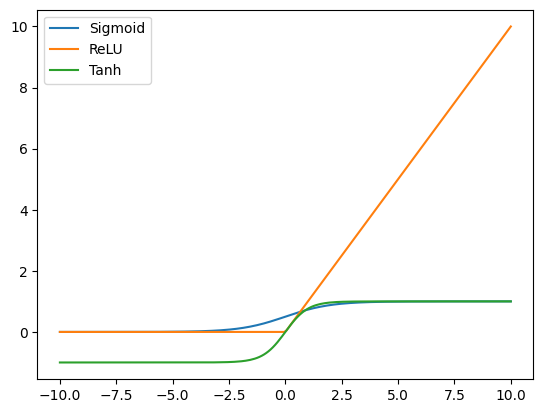

In [2]:
#Question 7: Visualize Sigmoid, ReLU, and Tanh activation functions
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.show()

In [4]:
#Question 8: Multilayer neural network on MNIST using Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Output accuracy
print("Training Accuracy:", history.history['accuracy'][-1])

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8698 - loss: 0.4564 - val_accuracy: 0.9613 - val_loss: 0.1345
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9620 - loss: 0.1306 - val_accuracy: 0.9732 - val_loss: 0.0981
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0793 - val_accuracy: 0.9755 - val_loss: 0.0851
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0559 - val_accuracy: 0.9767 - val_loss: 0.0804
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9864 - loss: 0.0456 - val_accuracy: 0.9777 - val_loss: 0.0813
Training Accuracy: 0.9853518605232239


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7764 - loss: 0.6490 - val_accuracy: 0.8488 - val_loss: 0.4165
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8606 - loss: 0.3897 - val_accuracy: 0.8715 - val_loss: 0.3581
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8715 - loss: 0.3474 - val_accuracy: 0.8750 - val_loss: 0.3446
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8845 - loss: 0.3182 - val_accuracy: 0.8675 - val_loss: 0.3627
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8919 - loss: 0.2969 - val_accuracy: 0.8748 - val_loss: 0.3488


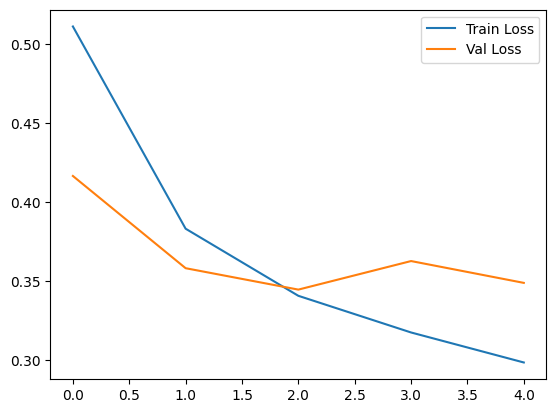

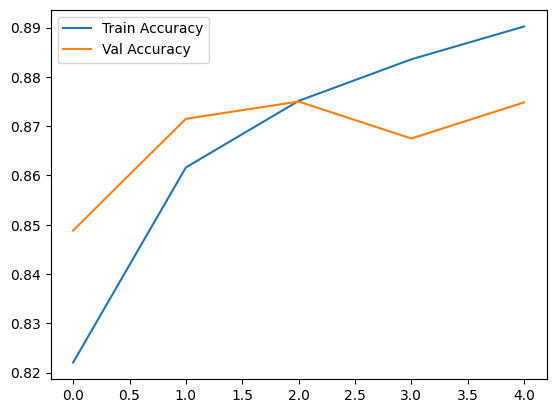

In [5]:
#Question 9: Visualize loss and accuracy curves on Fashion MNIST

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

Question 10: Deep learning workflow for fraud detection in banking

Answer:First, I would design a multilayer neural network to capture non-linear patterns in transaction data rather than a single perceptron. ReLU would be used in hidden layers for efficient training, and a Sigmoid activation in the output layer for binary classification. Binary Cross-Entropy would be chosen as the loss function since the task is fraud versus non-fraud classification.

To handle class imbalance, I would apply techniques such as class weighting, resampling, or focal loss. The model would be trained using mini-batch training and evaluated using precision, recall, F1-score, and ROC-AUC instead of accuracy. Adam optimizer would be suitable due to its fast convergence. Overfitting would be prevented using dropout, early stopping, and regularization. This workflow enables real-time fraud detection, reduces financial losses, and improves trust and operational efficiency for the bank.